# Analysing the Stock Price using Python

## Collecting Data

In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 929.6 kB/s eta 0:00:12
   -- ------------------------------------- 0.8/11.3 MB 931.2 kB/s eta 0:00:12
   -- ------------------------------------- 0.8/11.3 MB 931.2 kB/s eta 0:00:12
   --- ------------------------------------ 1.0/11.3 MB 931.8 kB/s eta 0:00:12
   --- ------------------------------------ 1.0/11.3 MB 931.8 kB/s eta 0:00:12
   ----- ---------------------------------- 1.6/11.3 MB 901.5 kB/s eta 0:00:11
   ----- ---------------------------------- 1.6/11.3 MB 901.5 kB/s eta 0:00:11
   ------ --------------------------------- 1.8/11.3 MB 915.0 kB/s eta 0:00:11
   ------- -------------------------------- 2.1/11.3 MB 910.2 kB/s eta 0:00:11
   ------- -------------------------------- 2.1/11.3 MB 910.2 kB/s eta 0:00:11


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.__version__

'0.13.2'

In [4]:
## glob : It is a build-in package which checks specific file packages or file patterns. 

import glob

In [5]:
glob.glob(r'E:\stock\individual_stocks_5yr\*.csv')

['E:\\stock\\individual_stocks_5yr\\AAL_data.csv',
 'E:\\stock\\individual_stocks_5yr\\AAPL_data.csv',
 'E:\\stock\\individual_stocks_5yr\\AAP_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ABBV_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ABC_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ABT_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ACN_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ADBE_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ADI_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ADM_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ADP_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ADSK_data.csv',
 'E:\\stock\\individual_stocks_5yr\\ADS_data.csv',
 'E:\\stock\\individual_stocks_5yr\\AEE_data.csv',
 'E:\\stock\\individual_stocks_5yr\\AEP_data.csv',
 'E:\\stock\\individual_stocks_5yr\\AES_data.csv',
 'E:\\stock\\individual_stocks_5yr\\AET_data.csv',
 'E:\\stock\\individual_stocks_5yr\\AFL_data.csv',
 'E:\\stock\\individual_stocks_5yr\\AGN_data.csv',
 'E:\\stock\\individual_sto

In [ ]:
## storing the files of those stocks for analysis..

In [6]:
company_list =[
    r'E:\\stock\\individual_stocks_5yr\\AMZN_data.csv',
    r'E:\\stock\\individual_stocks_5yr\\AAPL_data.csv',
    r'E:\\stock\\individual_stocks_5yr\\GOOGL_data.csv',
    r'E:\\stock\\individual_stocks_5yr\\IBM_data.csv'
    
]

In [7]:
## importing warnings package inorder to ignore some future warnings..

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
## Using pandas append() function to collect data from various files..

In [10]:
all_data = pd.DataFrame()

for file in company_list:
    
    current_df = pd.read_csv(file)
    
    all_data = current_df._append(all_data, ignore_index=True)

In [11]:
all_data.shape ## dimensions of all_data dataframe

(5036, 7)

In [13]:
all_data.head(20)

,date,open,high,low,close,volume,Name
0,2013-02-08,199.97,202.090,199.68,201.68,2893254,IBM
1,2013-02-11,200.98,201.950,199.75,200.16,2944651,IBM
2,2013-02-12,200.01,200.735,199.02,200.04,2461779,IBM
3,2013-02-13,200.65,200.950,199.57,200.09,2169757,IBM
4,2013-02-14,199.73,200.320,199.26,199.65,3294126,IBM
5,2013-02-15,199.98,201.250,199.82,200.98,3627887,IBM
6,2013-02-19,200.60,201.890,200.22,200.32,2998317,IBM
7,2013-02-20,200.62,201.720,198.86,199.31,3715311,IBM
8,2013-02-21,198.63,199.070,198.11,198.33,3923051,IBM
9,2013-02-22,199.23,201.090,198.84,201.09,3107876,IBM


In [14]:
all_data['Name'].unique()

array(['IBM', 'GOOGL', 'AAPL', 'AMZN'], dtype=object)

## Analyzing change in price of the stock overtime

In [15]:
all_data.isnull().sum() ## checking missing values

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [16]:
all_data.dtypes ## checking data-types

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [17]:
all_data['date'] = pd.to_datetime(all_data['date']) ## converting the date feature data-type into date-time

In [18]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [19]:
tech_list = all_data['Name'].unique()

In [20]:
tech_list

array(['IBM', 'GOOGL', 'AAPL', 'AMZN'], dtype=object)

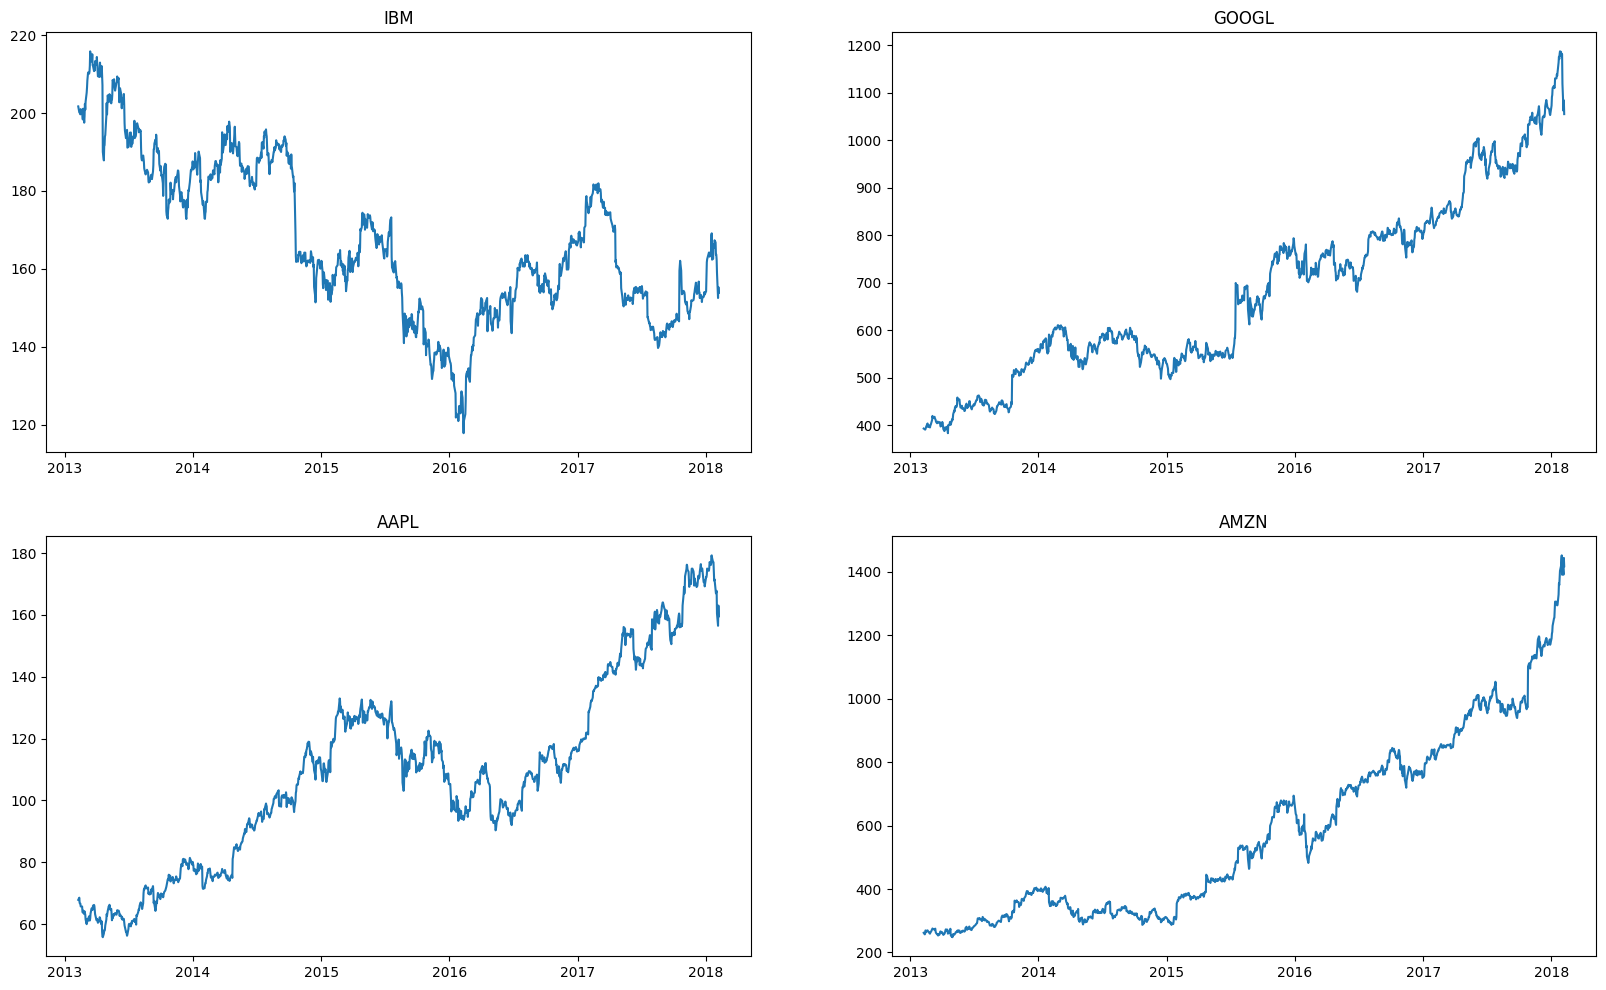

In [21]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)            ## creating subplot for each stock
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])   ## plotting "date" vs "close"
    plt.title(company)  

## Analysing moving average of various stocks

In [22]:
## moving average: It is a method in statistics that calculates the average change in data over a specific interval.

all_data['close'].rolling(window=10).mean().head(10)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9    200.165
Name: close, dtype: float64

In [23]:
new_data = all_data.copy()

In [24]:
## Lets consider different windows of rolling, ie 10, 20 & 50 days...

ma_day = [10, 20, 50]

for ma in ma_day:
    new_data['close_' + str(ma)] = new_data['close'].rolling(ma).mean()

In [25]:
new_data.tail(10)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
5026,2018-01-25,1368.00,1378.34,1357.62,1377.95,4753012,AMZN,1319.495,1265.9310,1203.0580
5027,2018-01-26,1392.01,1402.53,1380.91,1402.05,4857310,AMZN,1332.032,1276.9205,1208.5156
5028,2018-01-29,1409.18,1431.39,1400.44,1417.68,5701898,AMZN,1343.280,1288.4995,1214.1324
5029,2018-01-30,1403.17,1439.25,1392.00,1437.82,5871942,AMZN,1356.576,1301.9170,1220.3550
5030,2018-01-31,1451.30,1472.58,1450.04,1450.89,6424693,AMZN,1372.165,1315.0110,1226.6270
5031,2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808,AMZN,1381.833,1324.3010,1231.8294
5032,2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722,AMZN,1395.370,1335.3190,1237.9022
5033,2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985,AMZN,1401.639,1343.3620,1242.9124
5034,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN,1409.669,1353.1605,1248.6460
5035,2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741,AMZN,1415.596,1361.3645,1253.2616


In [26]:
new_data.tail(30)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
5006,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN,1175.807,1168.5310,1119.2316
5007,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN,1177.525,1167.9640,1122.7500
5008,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN,1179.722,1169.2055,1126.2894
5009,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN,1179.243,1168.8415,1129.7388
5010,2018-01-02,1172.00,1190.00,1170.51,1189.01,2694494,AMZN,1180.230,1170.1745,1133.7868
5011,2018-01-03,1188.30,1205.49,1188.30,1204.20,3108793,AMZN,1181.592,1173.6870,1138.2126
5012,2018-01-04,1205.00,1215.87,1204.66,1209.59,3022089,AMZN,1183.813,1177.0880,1143.0784
5013,2018-01-05,1217.51,1229.14,1210.00,1229.14,3544743,AMZN,1188.965,1180.9275,1148.1432
5014,2018-01-08,1236.00,1253.08,1232.03,1246.87,4279475,AMZN,1196.176,1185.2815,1153.6224
5015,2018-01-09,1256.90,1259.33,1241.76,1252.70,3661316,AMZN,1204.610,1189.8165,1159.2278


In [27]:
new_data.set_index('date', inplace=True)

In [23]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,56.4600,57.080,56.39,56.620,8066626,EBAY,NaN,NaN,NaN
2013-02-11,56.5200,56.580,55.75,56.410,5150867,EBAY,NaN,NaN,NaN
2013-02-12,56.4000,57.180,56.11,56.780,10023081,EBAY,NaN,NaN,NaN
2013-02-13,56.8600,57.260,56.41,57.050,9095970,EBAY,NaN,NaN,NaN
2013-02-14,56.7900,57.120,56.63,56.830,7054543,EBAY,NaN,NaN,NaN
2013-02-15,56.8100,57.150,56.41,56.700,9130168,EBAY,NaN,NaN,NaN
2013-02-19,56.8600,56.980,56.36,56.680,5701679,EBAY,NaN,NaN,NaN
2013-02-20,56.9000,57.100,55.48,55.530,7395537,EBAY,NaN,NaN,NaN
2013-02-21,55.3400,55.580,53.90,54.620,10735036,EBAY,NaN,NaN,NaN


In [28]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

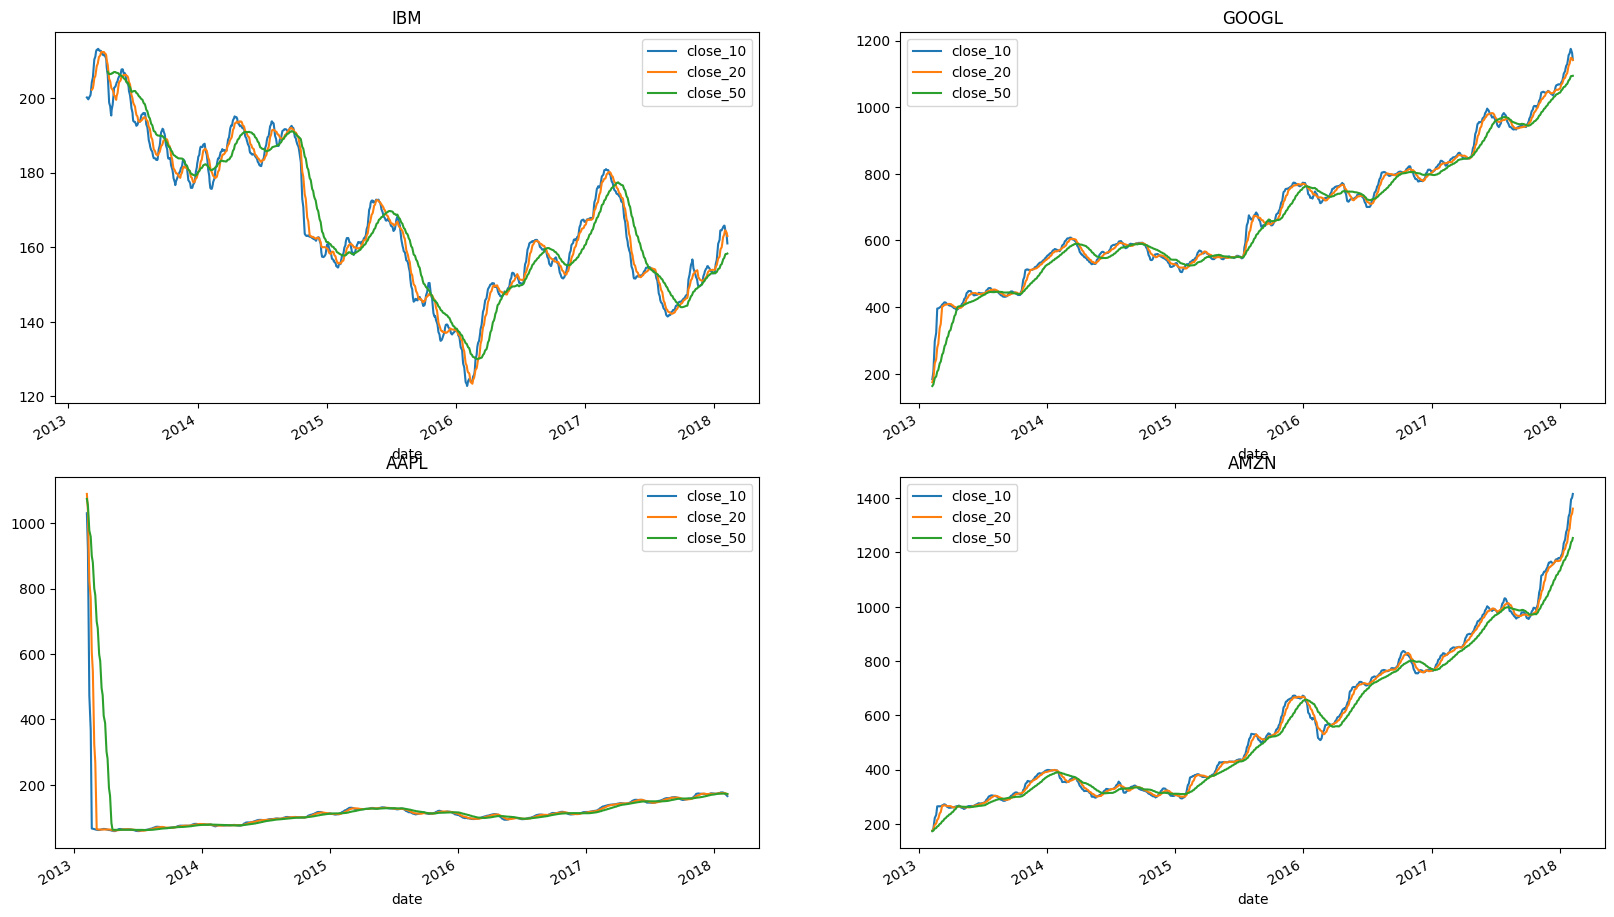

In [29]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

## Analyzing closing price change in Amazon stock

### Daily Stock Return formula

To calculate how much is gained or lost per day for a stock, substract the opening price from closing price and then multiply
the result by number of shares owned in the company

In [31]:
amazon = pd.read_csv(r'E:\\stock\\individual_stocks_5yr\\AMZN_data.csv')

In [32]:
amazon.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [33]:
amazon['close']

0        261.95
1        257.21
2        258.70
3        269.47
4        269.24
         ...   
1254    1390.00
1255    1429.95
1256    1390.00
1257    1442.84
1258    1416.78
Name: close, Length: 1259, dtype: float64

In [34]:
amazon.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN


In [35]:
### pct_change() returns : Percentage change between the current and a prior element.

amazon['Daily return(in %)'] = amazon['close'].pct_change() * 100

In [36]:
%pip install plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 985.5 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/9.6 MB 985.5 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/9.6 MB 780.2 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.6 MB 780.2 kB/s eta 0:00:12
   ----- ---------------------------------- 1.3/9.6 MB 919.0 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.6 MB 998.3 kB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.6 MB 1.0 MB/s eta 0:00:08
   -------- ------------------------------- 2.1/9.6 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.6 MB 1.2 MB/s eta 0:00:06
   ----------- ---------------------------- 2.9/9.6 MB 1.2 MB/s eta 0:00:06
   ------------- ----

In [37]:
import plotly.express as px

In [38]:
px.line(amazon, x="date", y="Daily return(in %)")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'date=%{x}<br>Daily return(in %)=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array(['2013-02-08', '2013-02-11', '2013-02-12', ..., '2018-02-05',
                          '2018-02-06', '2018-02-07'], shape=(1259,), dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAA+H/ojSYtvPP8v6AGT9yRie' ... 'a1WQbAKt9uxVhpDkC4ANsaCOb8vw=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Daily return(in %)'}}}
})

## Performing resampling analysis of closing price

In [39]:
## Resampling analysis is a statistical method which involves drawing repeated samples from original data sample.

amazon.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [40]:
amazon['date'] = pd.to_datetime(amazon['date'])

In [35]:
amazon.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [41]:
amazon.head(5)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,NaN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-1.809506
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,0.579293
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,4.163123
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,-0.085353


In [42]:
amazon.set_index('date', inplace=True)

In [43]:
amazon.head(5)

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,NaN
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-1.809506
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,0.579293
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,4.163123
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,-0.085353


In [44]:
amazon['close'].resample('M').mean() ## resampling the data on monthly basis

date
2013-02-28     263.995000
2013-03-31     265.758400
2013-04-30     263.072364
2013-05-31     262.727727
2013-06-30     274.101900
                 ...     
2017-10-31    1000.720000
2017-11-30    1139.808095
2017-12-31    1168.841500
2018-01-31    1309.010952
2018-02-28    1413.914000
Freq: ME, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

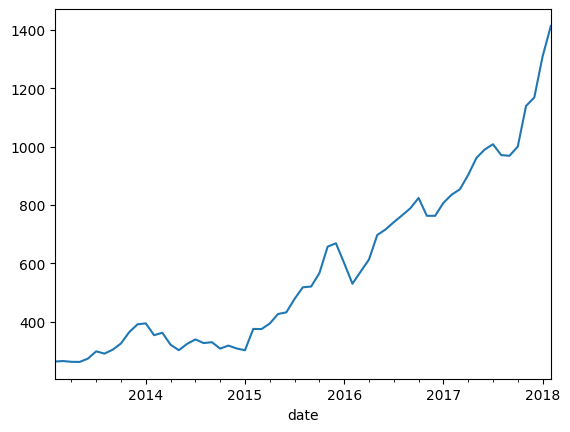

In [45]:
amazon['close'].resample('M').mean().plot()

In [46]:
amazon['close'].resample('Y').mean() ## resampling the data on yearly basis

date
2013-12-31     301.564912
2014-12-31     332.550976
2015-12-31     478.138194
2016-12-31     699.523135
2017-12-31     968.151394
2018-12-31    1329.184615
Freq: YE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

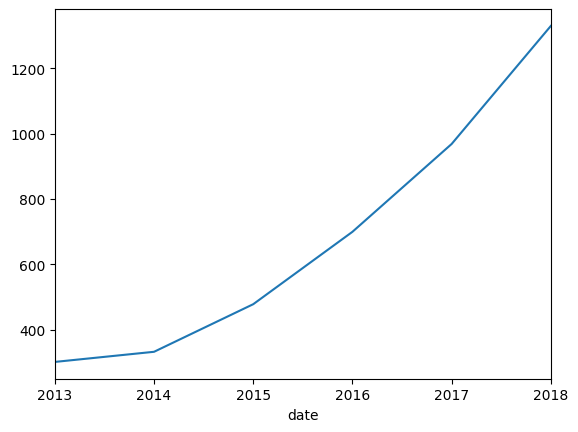

In [47]:
amazon['close'].resample('Y').mean().plot()

In [48]:
amazon['close'].resample('Q').mean() ## resampling the data on quaterly basis

date
2013-03-31     265.032294
2013-06-30     266.400625
2013-09-30     298.085219
2013-12-31     359.616844
2014-03-31     371.143689
2014-06-30     316.389365
2014-09-30     332.636656
2014-12-31     311.590703
2015-03-31     351.658361
2015-06-30     418.003254
2015-09-30     505.616094
2015-12-31     630.406719
2016-03-31     567.619672
2016-06-30     676.453437
2016-09-30     765.451875
2016-12-31     783.699841
2017-03-31     833.496452
2017-06-30     954.157619
2017-09-30     982.359524
2017-12-31    1100.454603
2018-03-31    1329.184615
Freq: QE-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

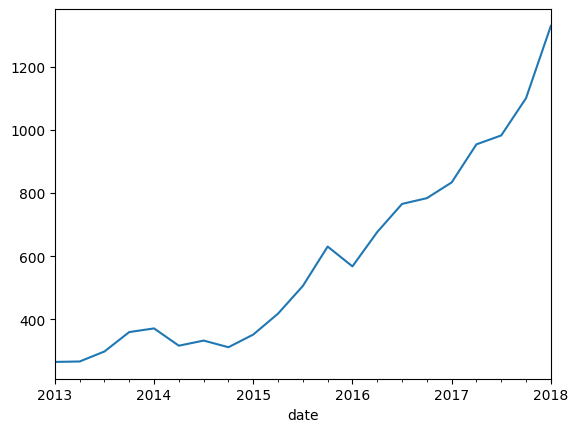

In [49]:
amazon['close'].resample('Q').mean().plot()

## Performing Multi-Variate Analysis to understand co-relation

In [50]:
company_list

['E:\\\\stock\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'E:\\\\stock\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'E:\\\\stock\\\\individual_stocks_5yr\\\\GOOGL_data.csv',
 'E:\\\\stock\\\\individual_stocks_5yr\\\\IBM_data.csv']

In [51]:
amzn = pd.read_csv(company_list[0])
apple   = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
ibm = pd.read_csv(company_list[3]) 

In [52]:
closing_price = pd.DataFrame()

In [53]:
closing_price['amazon_close'] = amzn['close']
closing_price['apple_close'] = apple['close']
closing_price['google_close'] = google['close']
closing_price['ibm_close'] = ibm['close']

In [54]:
closing_price

,amazon_close,apple_close,google_close,ibm_close
0,261.95,67.8542,393.0777,201.68
1,257.21,68.5614,391.6012,200.16
2,258.70,66.8428,390.7403,200.04
3,269.47,66.7156,391.8214,200.09
4,269.24,66.6556,394.3039,199.65
...,...,...,...,...
1254,1390.00,167.7800,1181.5900,162.40
1255,1429.95,160.5000,1119.2000,159.03
1256,1390.00,156.4900,1062.3900,152.53
1257,1442.84,163.0300,1084.4300,155.34


In [ ]:
'''
    Pair-plot is all about , we can considering some pairs & 
    we are trying to plot scatterplot of it..
    
    Unique plots : 4c2 = 6 unique plots
    
    Total plots : 15 ( 6 unique + 6 mirror images of these 
    unique one + 3 diagonal plots(histogram))

'''


# Dis-advantages: 
## Can't be used when number of features are high.
## Cannot visualize higher dimensional patterns in 3-D and 4-D. 
## Only possible to view 2D patterns.



# NOTE: the diagnol elements are (histogram) for each feature.

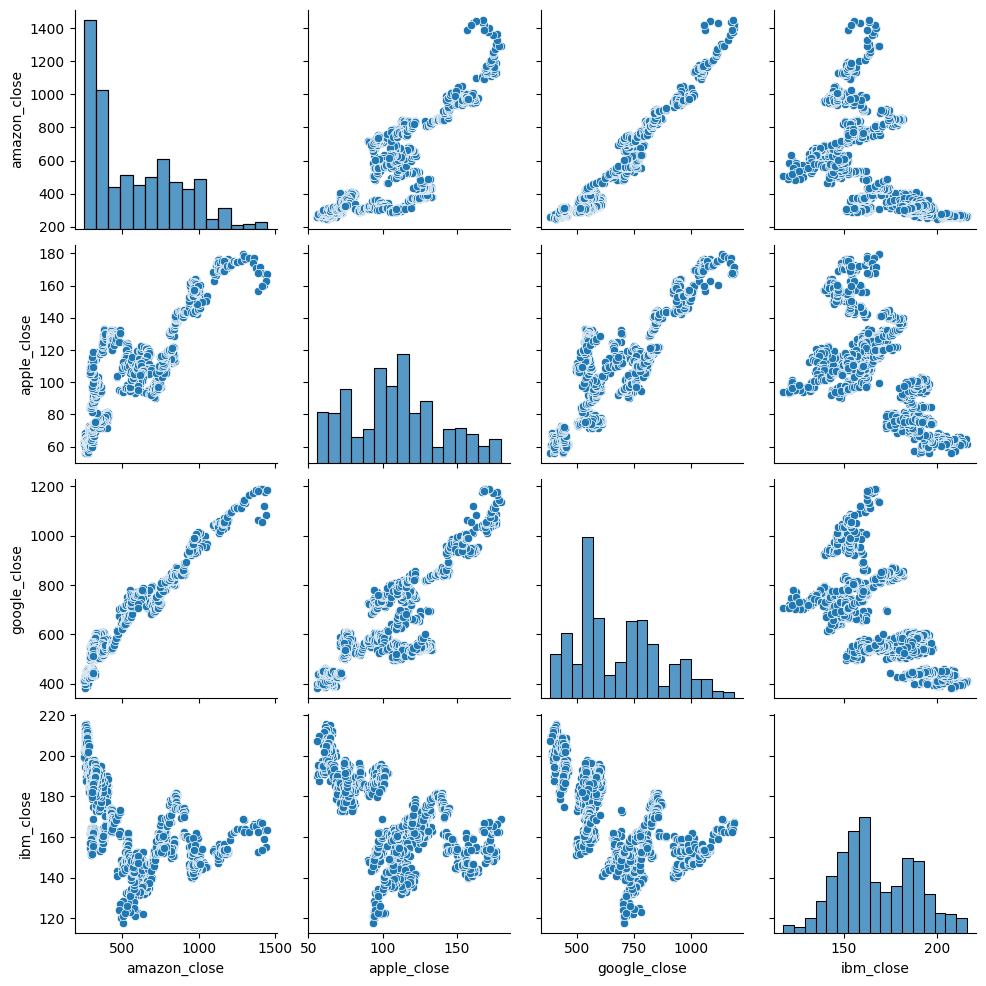

In [55]:
## Pairplot is a function of seaborn library that plots pairwise relationships in a dataset.

sns.pairplot(closing_price)

In [56]:
## If company 1 price increase then company 2 stock price will also increase.This is called co-relation.

closing_price.corr()

,amazon_close,apple_close,google_close,ibm_close
amazon_close,1.000000,0.819078,0.973988,-0.573345
apple_close,0.819078,1.000000,0.843736,-0.606435
google_close,0.973988,0.843736,1.000000,-0.626969
ibm_close,-0.573345,-0.606435,-0.626969,1.000000


<Axes: >

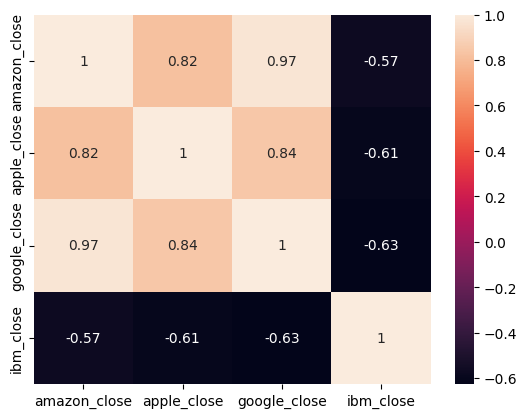

In [57]:
sns.heatmap(closing_price.corr(), annot=True)

In [ ]:
'''

Conclusion:
Closing price of Amazon, Facebook & Google are coorelated
& Closing price of Facebook, Amazon & Google has a co-relation of 0.97


'''

## Analyzing whether closing price of stocks are coorelated or not

In [58]:
closing_price

,amazon_close,apple_close,google_close,ibm_close
0,261.95,67.8542,393.0777,201.68
1,257.21,68.5614,391.6012,200.16
2,258.70,66.8428,390.7403,200.04
3,269.47,66.7156,391.8214,200.09
4,269.24,66.6556,394.3039,199.65
...,...,...,...,...
1254,1390.00,167.7800,1181.5900,162.40
1255,1429.95,160.5000,1119.2000,159.03
1256,1390.00,156.4900,1062.3900,152.53
1257,1442.84,163.0300,1084.4300,155.34


In [59]:
closing_price['ibm_close']

0       201.68
1       200.16
2       200.04
3       200.09
4       199.65
         ...  
1254    162.40
1255    159.03
1256    152.53
1257    155.34
1258    153.85
Name: ibm_close, Length: 1259, dtype: float64

In [60]:
closing_price['ibm_close'].shift(1)

0          NaN
1       201.68
2       200.16
3       200.04
4       200.09
         ...  
1254    163.70
1255    162.40
1256    159.03
1257    152.53
1258    155.34
Name: ibm_close, Length: 1259, dtype: float64

In [61]:
(closing_price['ibm_close'] - closing_price['ibm_close'].shift(1))/closing_price['ibm_close'].shift(1) * 100

0            NaN
1      -0.753669
2      -0.059952
3       0.024995
4      -0.219901
          ...   
1254   -0.794136
1255   -2.075123
1256   -4.087279
1257    1.842261
1258   -0.959186
Name: ibm_close, Length: 1259, dtype: float64

In [62]:
closing_price.columns

Index(['amazon_close', 'apple_close', 'google_close', 'ibm_close'], dtype='object')

In [63]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [64]:
closing_price.columns

Index(['amazon_close', 'apple_close', 'google_close', 'ibm_close',
       'amazon_close_pct_change', 'apple_close_pct_change',
       'google_close_pct_change', 'ibm_close_pct_change'],
      dtype='object')

In [66]:
closing_p = closing_price[['amazon_close_pct_change', 'apple_close_pct_change', 'google_close_pct_change', 'ibm_close_pct_change']]

In [67]:
closing_p

,amazon_close_pct_change,apple_close_pct_change,google_close_pct_change,ibm_close_pct_change
0,NaN,NaN,NaN,NaN
1,-1.809506,1.042235,-0.375625,-0.753669
2,0.579293,-2.506658,-0.219841,-0.059952
3,4.163123,-0.190297,0.276680,0.024995
4,-0.085353,-0.089934,0.633579,-0.219901
...,...,...,...,...
1254,-4.196734,0.209043,-0.053290,-0.794136
1255,2.874101,-4.339015,-5.280173,-2.075123
1256,-2.793804,-2.498442,-5.075947,-4.087279
1257,3.801439,4.179181,2.074568,1.842261


In [ ]:
'''
Pairplot : we have histogram on diagonals & scatterplot/kde/
            any_other_plot which tells dist.. on rest of the plot 


Pairgrid : Once we create grid , we can set plot as per our need : 

ie , if we have 4 features , it creates total 16 graphs/plots or matrices of 4*4



    There would be various possibilities for type of plots in our Pairgrid which we can set as per our need :

    a) all plots can be scatterplot
    b) on diagonal , we have histogram & rest will be scatterplot
    c) on diagonal , we have histogram & rest will be kdeplot 
    c) on diagonal , we have histogram & below diagonal will be kdeplot
            & upper diagonal will be scatterplot 

Note :: kdeplot for 2 features also known as contour plots which returns density
but kdeplot returns distribution if we are performing univariate analysis else it will show density ..

'''

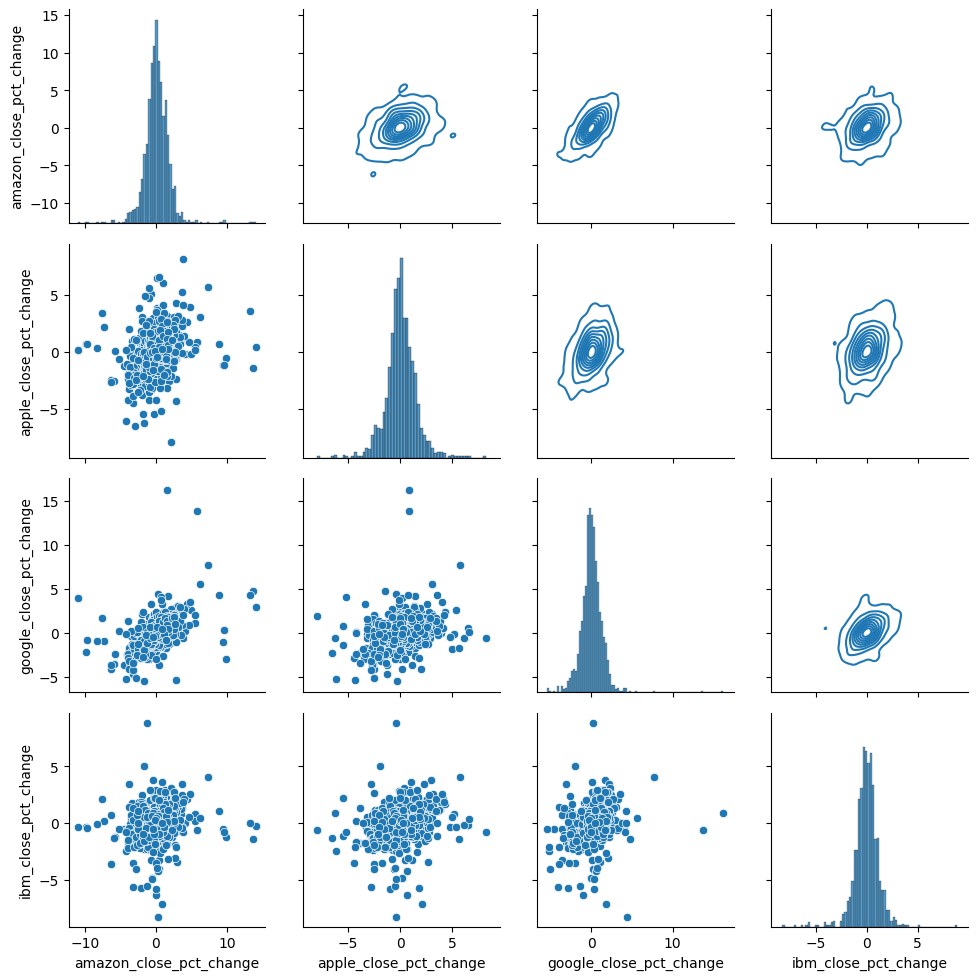

In [68]:
## PairGrid is a function of the seaborn library that allows us to draw a grid of subplots using the same plot type to visualize data.

g = sns.PairGrid(data= closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [69]:
closing_p.corr()

,amazon_close_pct_change,apple_close_pct_change,google_close_pct_change,ibm_close_pct_change
amazon_close_pct_change,1.000000,0.287659,0.548423,0.229011
apple_close_pct_change,0.287659,1.000000,0.348858,0.263927
google_close_pct_change,0.548423,0.348858,1.000000,0.318281
ibm_close_pct_change,0.229011,0.263927,0.318281,1.000000


<Axes: >

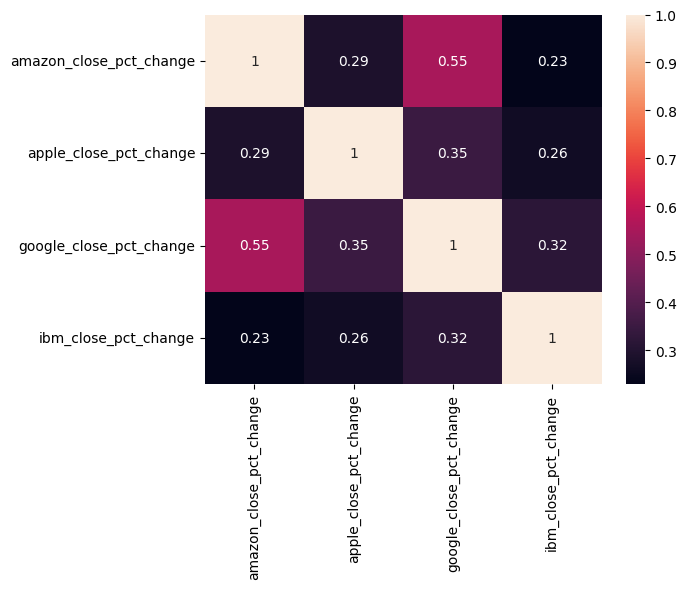

In [70]:
sns.heatmap(closing_p.corr(), annot=True)

In [ ]:
'''
Conclusion:
While comparing 'AMZN_close_pct_change' to 'IBM_close_pct_change' it shows a linear relationship to some extent.


'''